In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# California House Pricing Dataset

from sklearn.datasets import fetch_california_housing
california_df= fetch_california_housing()

In [3]:
print(california_df.data) # Independent data

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [4]:
print(california_df.target) # Dependent feature

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [5]:
## make a dataframe for best visualization of data

pd.DataFrame(california_df.data,columns=california_df.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
df= pd.DataFrame(california_df.data,columns=california_df.feature_names)

df["Target"]= pd.DataFrame(california_df.target)

In [7]:
df.shape # no of rows are very hogh, if you want to consider less amount of rows by doing sampling then we use sample module

(20640, 9)

In [8]:
df= df.sample(frac=0.25) # It will take the 25% of 20640 random records of original dataframe df
# we considered less records because while doing hyperparameters optimization, model will take 
# more time if we have more number of records

In [9]:
df.shape

(5160, 9)

In [10]:
# Independent features

X= df.iloc[:,:-1]

# Dependent features

y= df.iloc[:,-1]

In [11]:
X.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
13371,3.9241,16.0,5.298246,0.937343,1463.0,3.666667,34.11,-117.54
7462,2.4297,35.0,3.647510,1.038314,949.0,3.636015,33.93,-118.18
15045,6.6783,16.0,6.456876,0.946387,1269.0,2.958042,32.77,-116.92
18902,2.6708,52.0,4.863894,1.207940,1238.0,2.340265,38.11,-122.26
11367,5.9838,21.0,6.646840,1.029740,1846.0,3.431227,33.74,-117.95
18057,5.7876,33.0,6.117647,0.996324,759.0,2.790441,37.27,-122.00
15164,3.7784,25.0,5.928571,1.037267,1043.0,3.239130,32.95,-117.02
11356,3.1403,30.0,3.541756,0.929336,1843.0,3.946467,33.74,-117.93
19330,4.7105,22.0,6.500000,1.074219,1309.0,2.556641,38.46,-122.85
2114,1.3278,32.0,4.408511,1.057447,2002.0,4.259574,36.76,-119.75


In [12]:
y

11271    2.133
11622    2.739
15480    1.932
20491    1.918
18692    2.247
         ...  
15510    1.577
3264     0.926
11523    2.661
19958    0.783
20249    3.018
Name: Target, Length: 5160, dtype: float64

In [13]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,3.840336,28.778295,5.363140,1.086789,1420.389535,3.014148,35.653436,-119.596126
std,1.887334,12.694056,1.809322,0.315191,1099.822857,7.052257,2.161115,2.034057
min,0.499900,2.000000,0.846154,0.375000,3.000000,0.750000,32.540000,-124.300000
25%,2.557875,18.000000,4.435151,1.007505,779.000000,2.422903,33.940000,-121.830000
50%,3.521850,29.000000,5.201138,1.047815,1166.000000,2.795036,34.270000,-118.530000
75%,4.702075,37.000000,6.021949,1.098736,1713.000000,3.250000,37.740000,-118.000000
max,15.000100,52.000000,47.515152,11.181818,16305.000000,502.461538,41.880000,-114.310000


In [14]:
X.isna().any() # No null values present in independent features

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

In [15]:
pd.DataFrame(y).isna().any()

Target    False
dtype: bool

In [16]:
X.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
11271,3.2857,21.0,3.945827,1.035139,1888.0,2.764275,33.79,-117.99
11622,5.8440,26.0,6.334877,0.983025,2072.0,3.197531,33.82,-118.04
15480,3.4833,15.0,5.746154,0.976923,997.0,2.556410,33.15,-117.13
20491,3.5313,15.0,5.306425,1.085667,1390.0,2.289951,34.27,-118.67
18692,3.2917,29.0,5.792490,1.057312,1954.0,3.861660,36.93,-121.73
7627,6.5799,26.0,5.835106,0.888298,701.0,3.728723,33.86,-118.27
3622,2.3584,15.0,3.629349,1.117647,4620.0,2.922201,34.23,-118.45
15311,1.9891,26.0,4.606704,1.279330,1703.0,1.902793,33.19,-117.38
5530,6.2022,43.0,6.310345,0.965517,581.0,2.504310,33.97,-118.41
6890,3.7560,31.0,4.977622,1.026573,2975.0,4.160839,34.05,-118.10


In [17]:
X.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14810,5.3177,40.0,7.075949,1.047468,767.0,2.427215,32.69,-117.17
950,4.9107,26.0,6.319820,1.033784,1453.0,3.272523,37.72,-121.93
19017,4.0938,20.0,5.660000,1.064000,667.0,2.668000,38.35,-121.96
5166,2.7917,43.0,4.765873,1.158730,840.0,3.333333,33.94,-118.28
16024,5.2088,52.0,5.760081,0.945565,1431.0,2.885081,37.73,-122.46
3119,4.1518,13.0,6.198068,1.084541,1181.0,2.852657,35.73,-117.87
12306,3.5882,21.0,13.568627,2.788235,658.0,2.580392,33.71,-116.68
14727,4.3152,33.0,6.046687,0.998494,1864.0,2.807229,32.79,-117.01
16047,2.8750,49.0,5.264615,1.070769,1138.0,3.501538,37.71,-122.46
20440,6.4963,6.0,7.799038,1.110096,6700.0,3.221154,34.24,-118.77


In [18]:
## You can perform the EDA and Feature engineering (as we already covered EDA and FE, we are not going to that deeper insights)

# Let's focus on decision tree regression model building

In [19]:
# peform tran test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [20]:
X_train.shape

(4128, 8)

In [21]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
11876,3.6415,15.0,7.491892,1.335135,703.0,3.800000,34.01,-117.37
19540,2.7209,32.0,5.090511,1.080292,1957.0,2.856934,37.64,-120.95
12534,1.1280,46.0,4.295455,1.047078,1684.0,2.733766,38.56,-121.50
16161,4.2414,49.0,4.857143,0.984375,1040.0,2.321429,37.78,-122.49
4575,1.9233,41.0,3.414013,1.054140,1111.0,3.538217,34.07,-118.28


In [22]:
y_train.head()

11876    1.24200
19540    0.88300
12534    1.23100
16161    5.00001
4575     2.07100
Name: Target, dtype: float64

In [23]:
# Decision tree Regressor

from sklearn.tree import DecisionTreeRegressor

regressor= DecisionTreeRegressor()

In [24]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [25]:
y_pred=regressor.predict(X_test)

In [26]:
## find the r2_score

from sklearn.metrics import r2_score

score= r2_score(y_pred,y_test)

In [27]:
print(score)

0.5205863622095328


In [28]:
# Code for condtructing the tree

# import matplotlib.pyplot as plt

# from sklearn import tree

# plt.figure(figsize=(12,10))

# tree.plot_tree(regressor,filled=True)

In [29]:
# Hyperparameter tuning

# As we know the parameters which are used in decision tree regressor

# class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2,
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
#                                          min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)

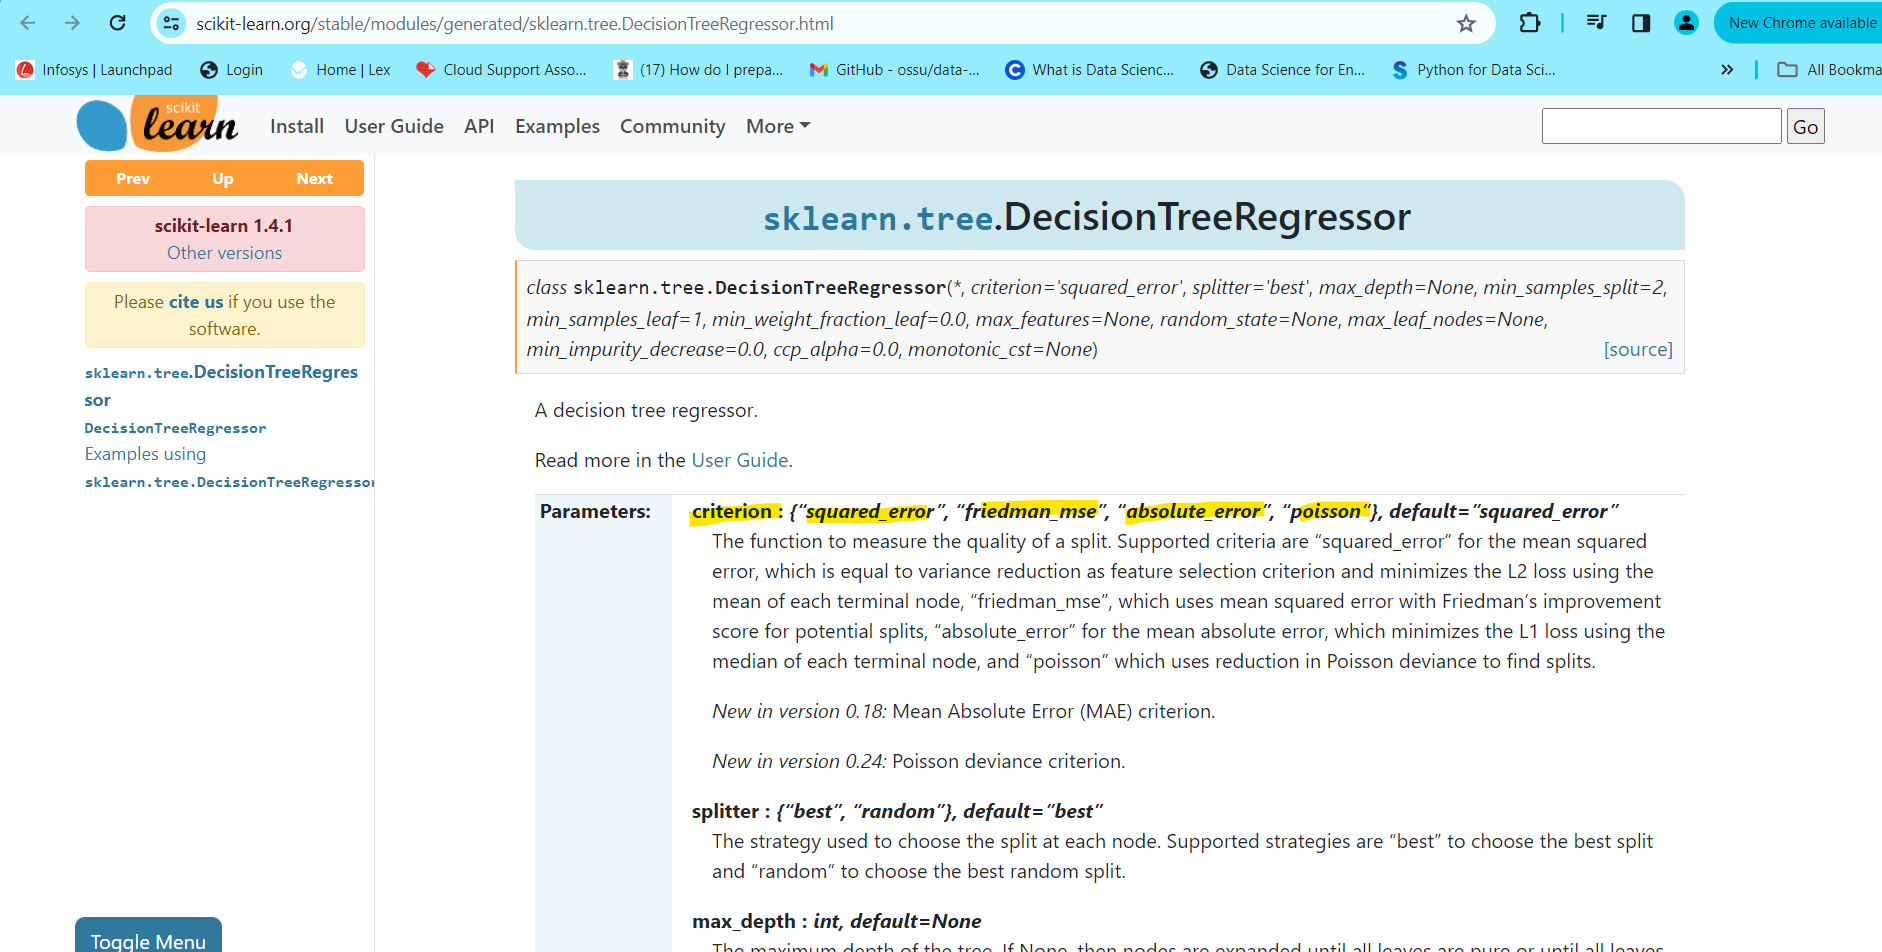

In [30]:
# Hyperparameter tuning

parameters={"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
           "splitter":["best","random"],
           "max_depth":[1,2,3,4,5,6,7,8],
           "max_features":["sqrt", "log2","auto"]}

regressor_model= DecisionTreeRegressor()

In [31]:
## As we know during hyperparameter optimization using GridSearchCV, we use scoring ="accuracy" for classification problem.
# But for the regression problem we can use the below metrics as scoring parameter

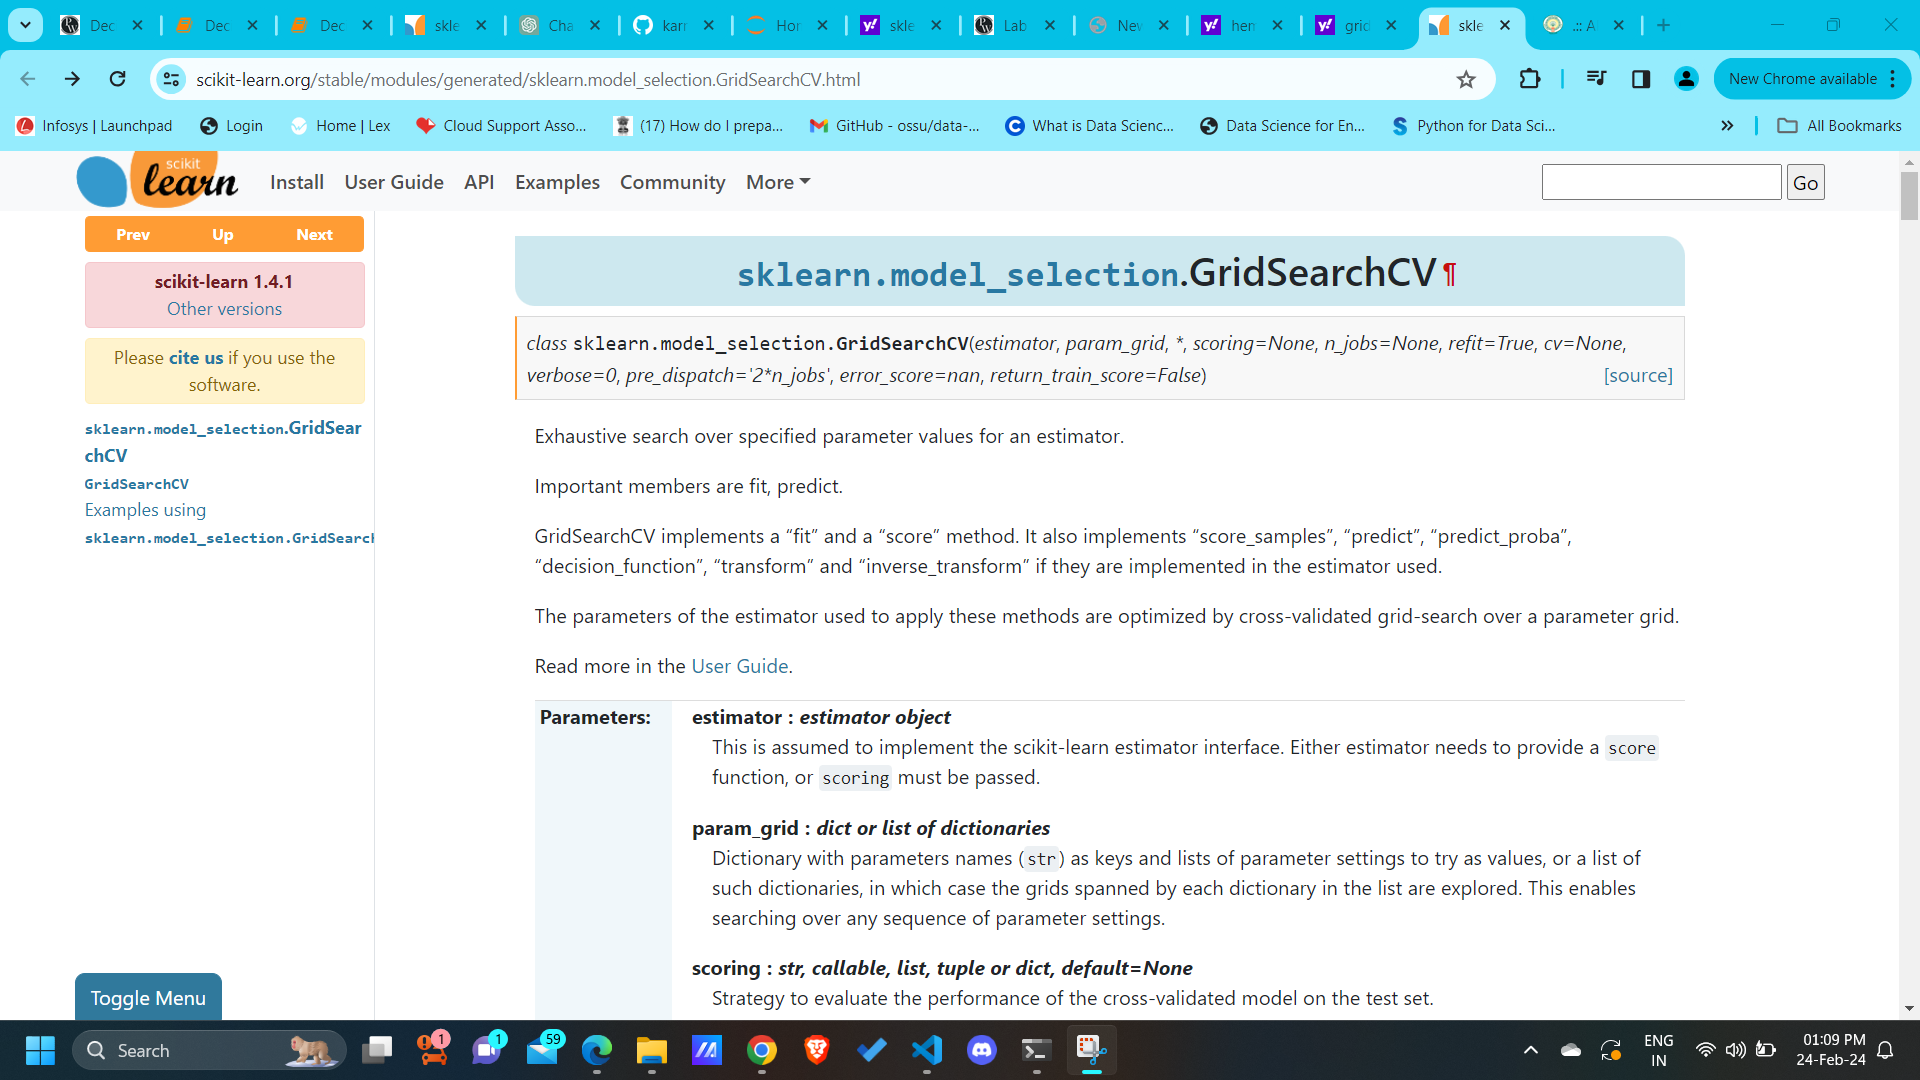

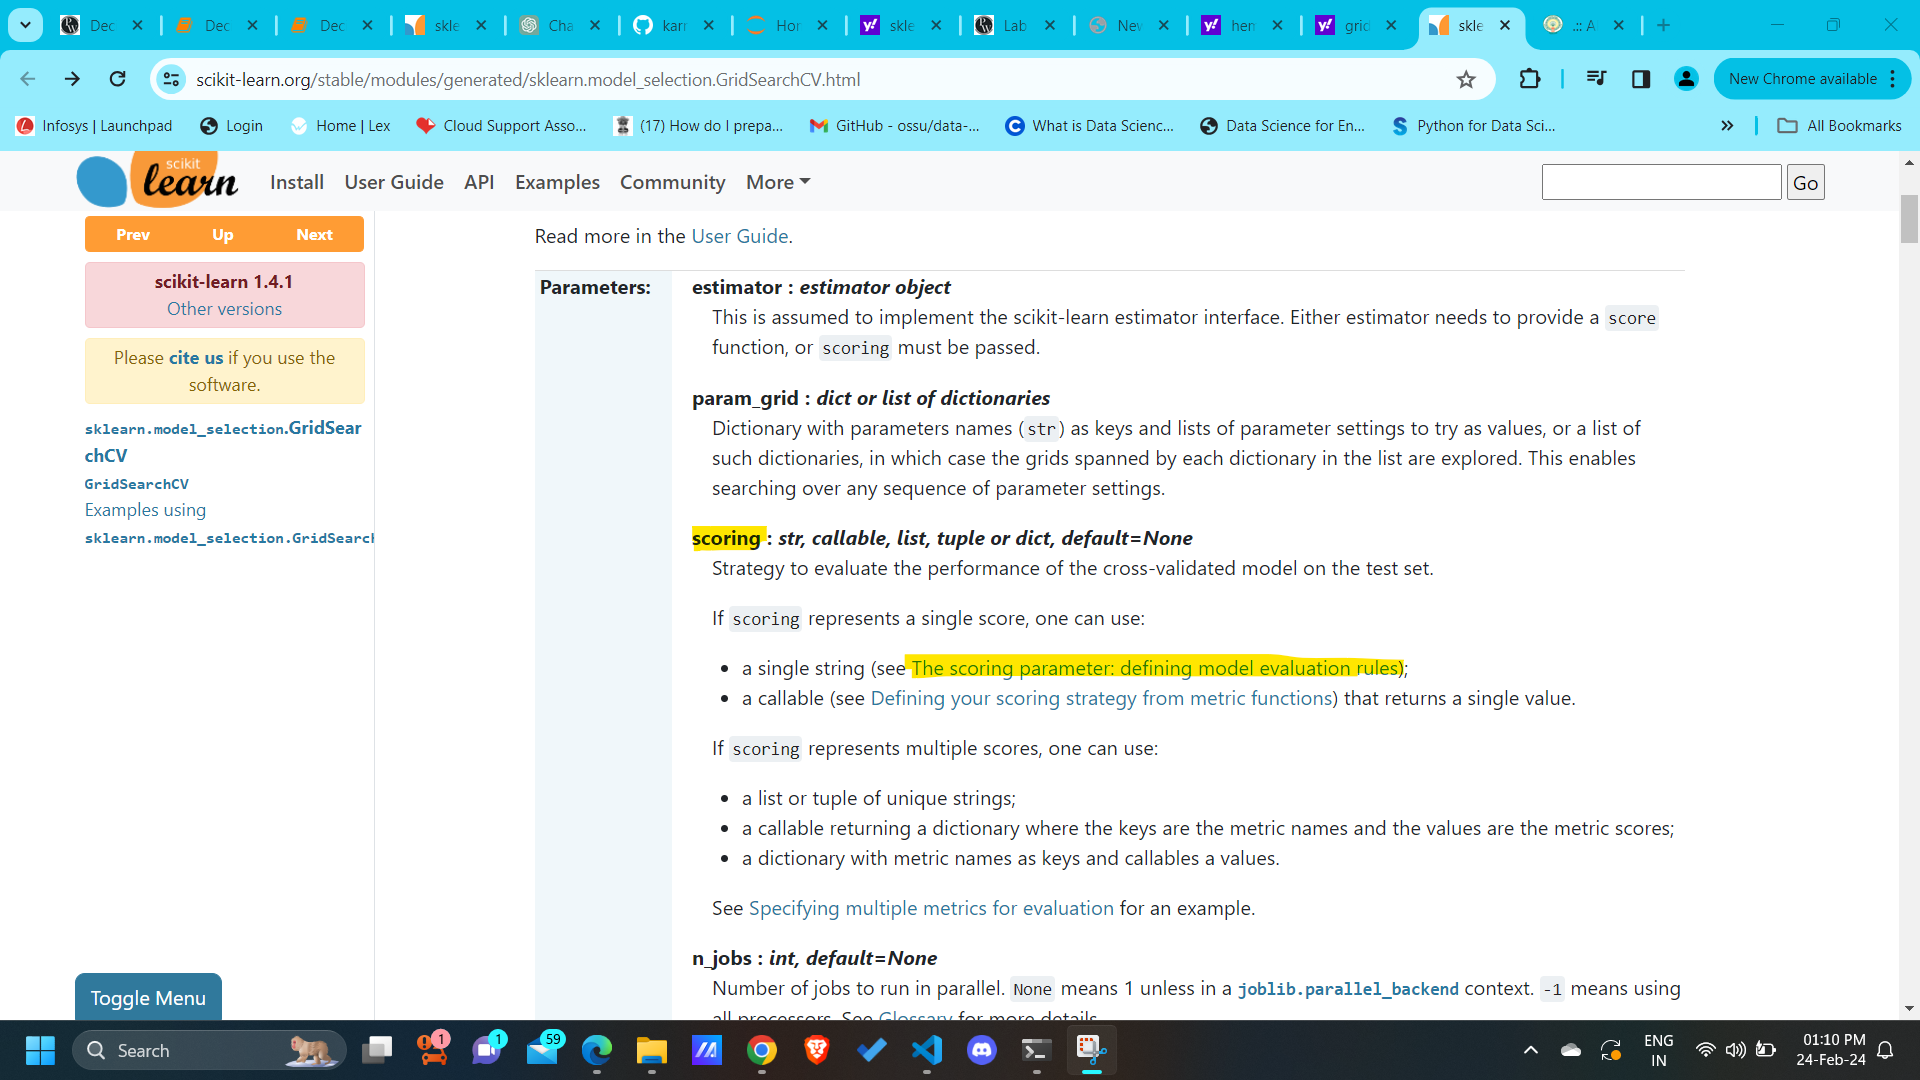

Link: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

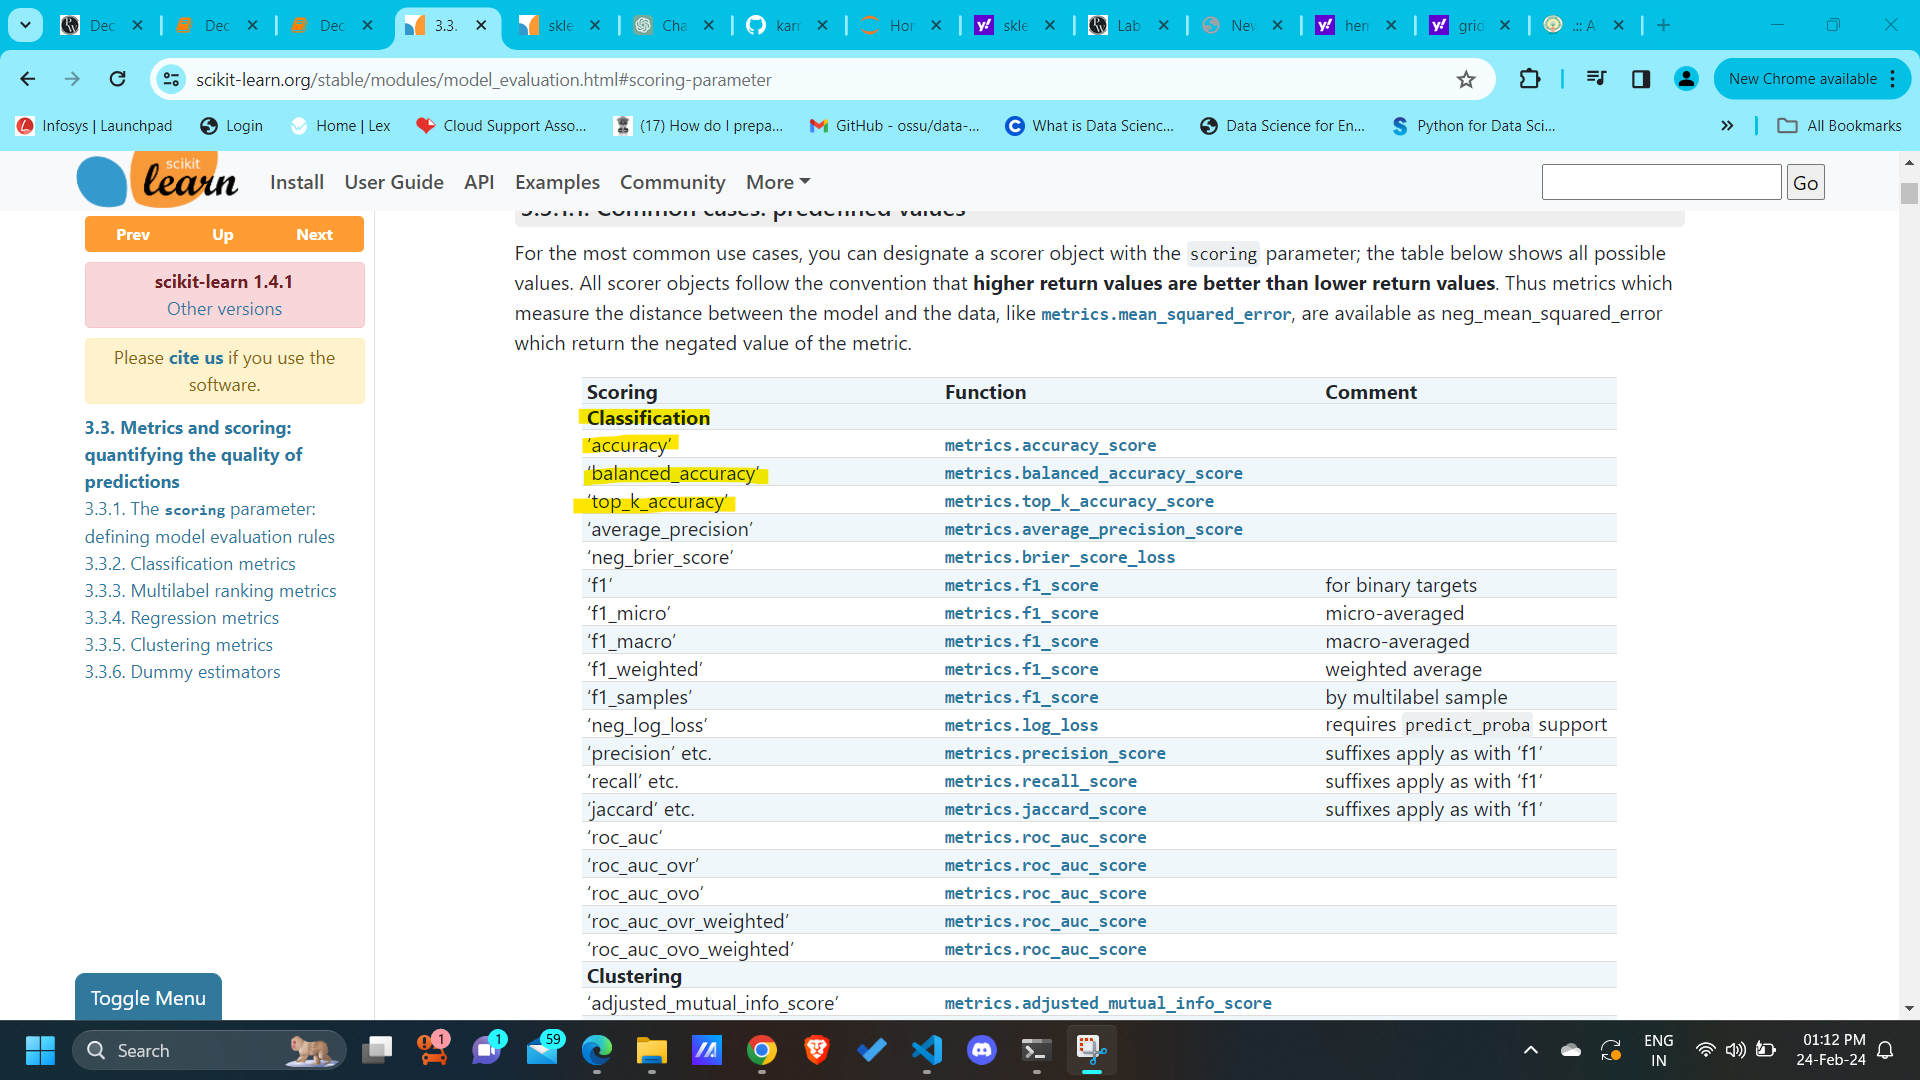

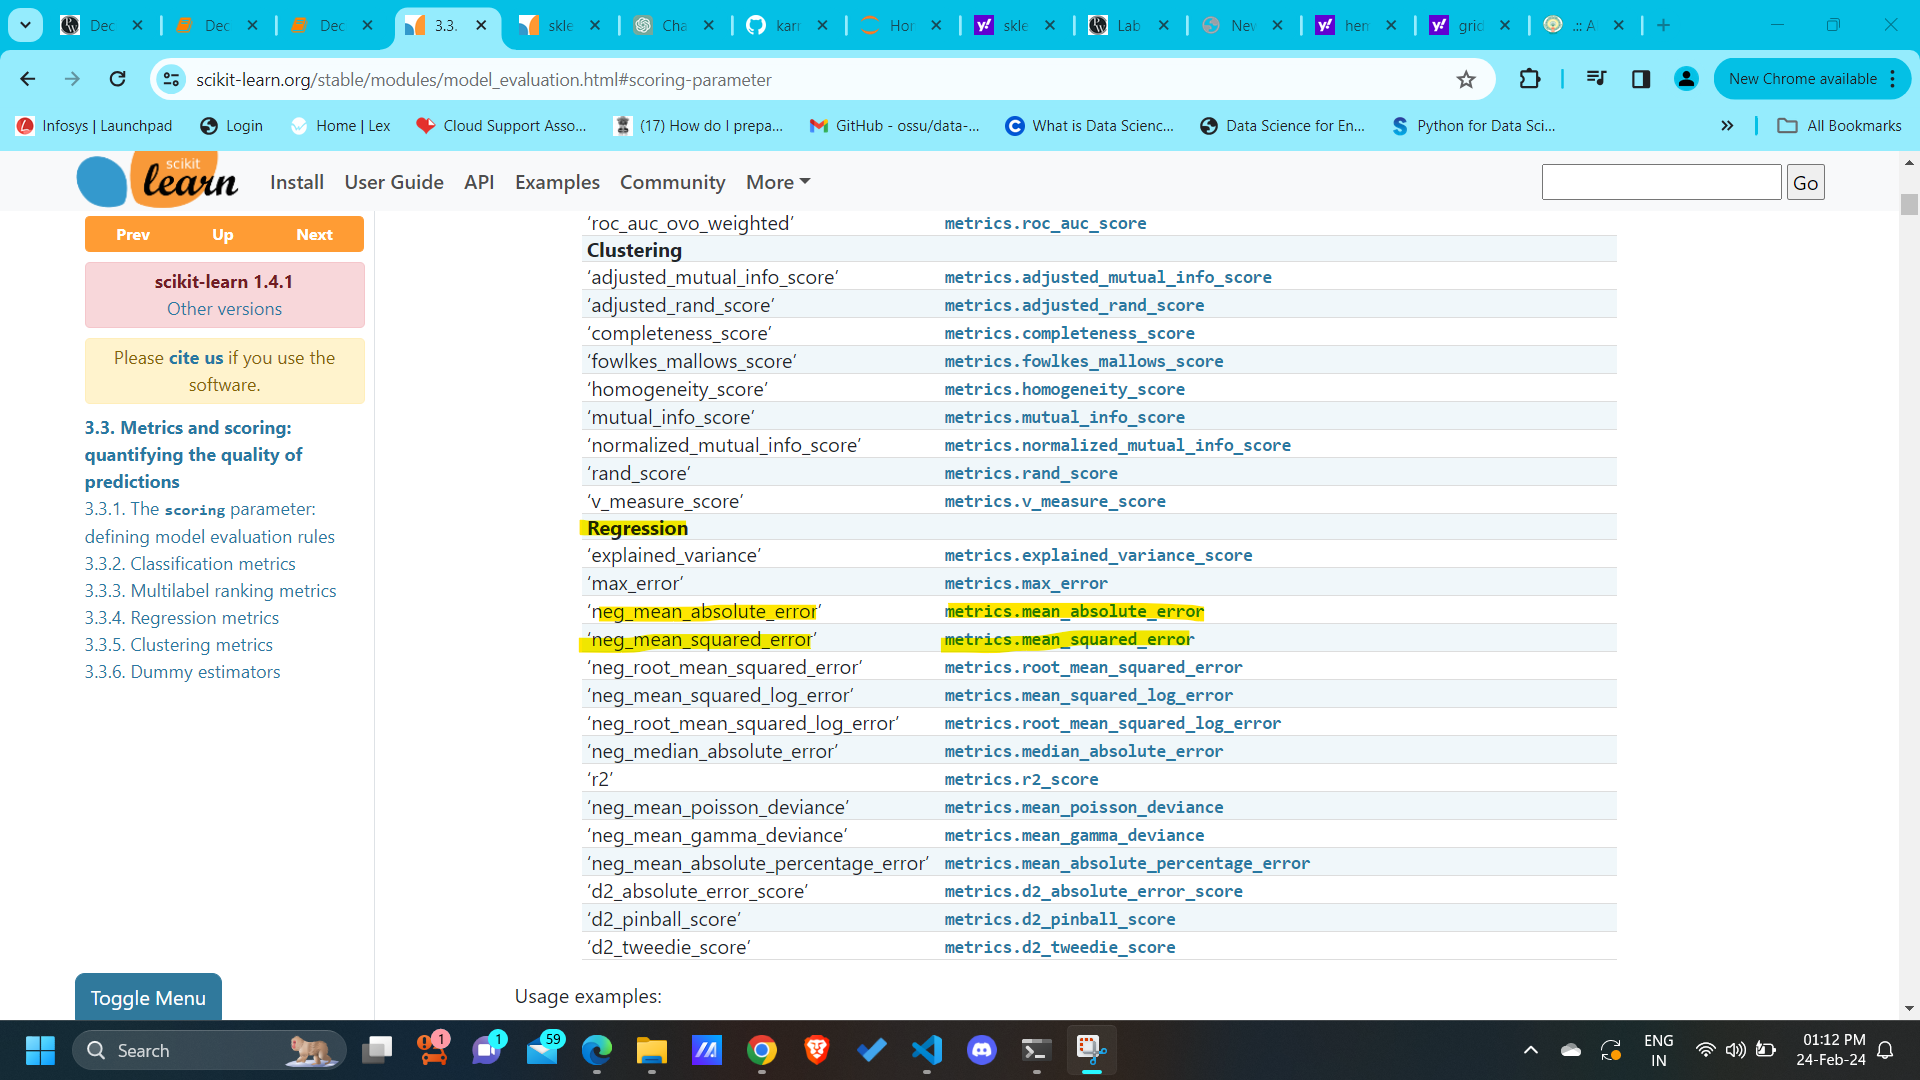

In [32]:
import warnings 
warnings.filterwarnings("ignore")

In [33]:
from sklearn.model_selection import GridSearchCV
regressor_cv= GridSearchCV(regressor_model,param_grid=parameters,cv=2,scoring="neg_mean_absolute_error")

## if we have outliers then we won't use "neg_mean_square_error"
# neg_mean_absolute_error will overcome the outlier

In [34]:
regressor_cv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [35]:
regressor_cv.best_params_ # It will provide the hyper parameters

{'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [36]:
y_pred_cv=regressor_cv.predict(X_test)

In [37]:
r2_score(y_pred_cv,y_test)

0.3585260349640692

In [38]:
## Let's use the above hyperparameters to train the model

regressor_hyper=DecisionTreeRegressor(criterion='absolute_error',max_depth=8, max_features= 'log2',splitter='best')

In [39]:
regressor_hyper.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      max_features='log2')

[Text(0.5370923913043478, 0.9444444444444444, 'x[6] <= 37.925\nabsolute_error = 0.889\nsamples = 4128\nvalue = 1.783'),
 Text(0.2858695652173913, 0.8333333333333334, 'x[5] <= 2.867\nabsolute_error = 0.924\nsamples = 3382\nvalue = 1.926'),
 Text(0.15235507246376812, 0.7222222222222222, 'x[7] <= -117.695\nabsolute_error = 1.038\nsamples = 1735\nvalue = 2.38'),
 Text(0.07065217391304347, 0.6111111111111112, 'x[7] <= -122.33\nabsolute_error = 1.022\nsamples = 1384\nvalue = 2.63'),
 Text(0.034057971014492754, 0.5, 'x[0] <= 6.257\nabsolute_error = 0.774\nsamples = 133\nvalue = 3.445'),
 Text(0.015942028985507246, 0.3888888888888889, 'x[2] <= 3.589\nabsolute_error = 0.696\nsamples = 116\nvalue = 3.352'),
 Text(0.005797101449275362, 0.2777777777777778, 'x[5] <= 1.534\nabsolute_error = 0.998\nsamples = 12\nvalue = 2.312'),
 Text(0.002898550724637681, 0.16666666666666666, 'absolute_error = 0.0\nsamples = 1\nvalue = 5.0'),
 Text(0.008695652173913044, 0.16666666666666666, 'x[3] <= 1.339\nabsolute_

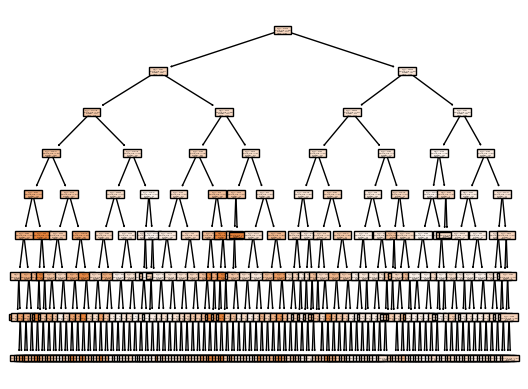

In [40]:
from sklearn import tree

tree.plot_tree(regressor_hyper,filled=True)

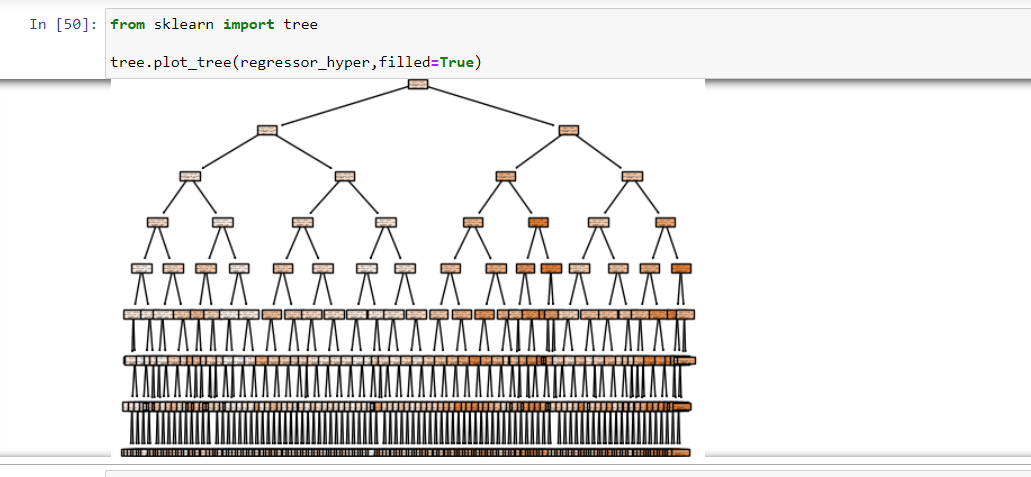

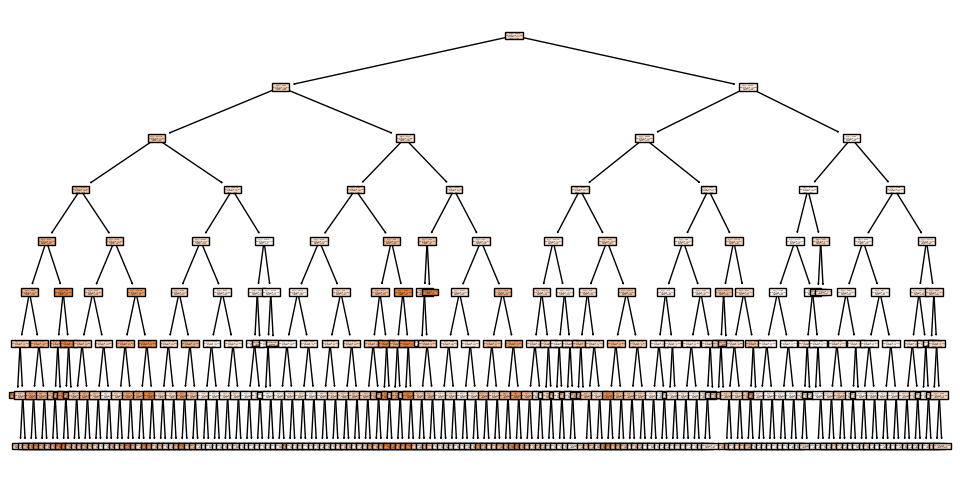

In [41]:
from sklearn import tree

plt.figure(figsize=(12,6))

tree.plot_tree(regressor_hyper,filled=True)

plt.show()

In [42]:
y_pred_hyper=regressor_hyper.predict(X_test)

In [43]:
# calculating r2_score

score= r2_score(y_pred_hyper,y_test)

In [44]:
print(score) # r2_score is improved as compared to earlier

0.4413465670007174


In [45]:
# Later we can create a pickle file for a model and we can use pickle file to deploy in AWS environment